### Import libraries

In [1]:
import torch
import warnings
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader
from datasets.gta5 import GTA5
from datasets.cityscapes import CityScapes
from torchvision.transforms import ToPILImage
from torchvision import transforms

from utils import fast_hist, per_class_iou
from models.bisenet.build_bisenet import BiSeNet

warnings.filterwarnings("ignore")

### Training

In [2]:
# Define the polynomial learning rate scheduler
def poly_lr_scheduler(optimizer, init_lr, iter, lr_decay_iter=1, max_iter=300, power=0.9):
    lr = init_lr * (1 - iter / max_iter) ** power
    optimizer.param_groups[0]['lr'] = lr
    return lr

# Set the device
device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
# Set model to training mode
model.train()

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5')
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))
    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Update the learning rate
    poly_lr_scheduler(optimizer, 0.001, epoch, max_iter=len(dataloader))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet_step3a/bisenet_shift.pth')

100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 0, Loss: 0.39375969767570496, mIoU: 0.22731228548730092


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 1, Loss: 0.4003223478794098, mIoU: 0.31755026278610926


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 2, Loss: 0.3092600405216217, mIoU: 0.35682719097503063


100%|██████████| 313/313 [02:15<00:00,  2.30it/s]


Epoch: 3, Loss: 0.2609001398086548, mIoU: 0.38263473222058364


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 4, Loss: 0.3921164274215698, mIoU: 0.4104515150034556


100%|██████████| 313/313 [02:16<00:00,  2.30it/s]


Epoch: 5, Loss: 0.2651103734970093, mIoU: 0.4312466226676055


100%|██████████| 313/313 [02:23<00:00,  2.19it/s]


Epoch: 6, Loss: 0.34240633249282837, mIoU: 0.45226273128071526


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 7, Loss: 0.23163893818855286, mIoU: 0.4723917463814374


100%|██████████| 313/313 [02:15<00:00,  2.31it/s]


Epoch: 8, Loss: 0.2547343373298645, mIoU: 0.48815554780633197


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 9, Loss: 0.19046586751937866, mIoU: 0.5032543539054818


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 10, Loss: 0.26480337977409363, mIoU: 0.5184420027013972


100%|██████████| 313/313 [02:15<00:00,  2.32it/s]


Epoch: 11, Loss: 0.264546662569046, mIoU: 0.5335978199061302


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 12, Loss: 0.20804272592067719, mIoU: 0.5445307039836271


100%|██████████| 313/313 [02:24<00:00,  2.16it/s]


Epoch: 13, Loss: 0.23425140976905823, mIoU: 0.5524007438725629


100%|██████████| 313/313 [02:18<00:00,  2.26it/s]


Epoch: 14, Loss: 0.18963664770126343, mIoU: 0.5601498354269946


100%|██████████| 313/313 [02:24<00:00,  2.16it/s]


Epoch: 15, Loss: 0.2193925529718399, mIoU: 0.5665335314783366


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 16, Loss: 0.16414424777030945, mIoU: 0.5722440663717469


100%|██████████| 313/313 [02:19<00:00,  2.25it/s]


Epoch: 17, Loss: 0.20275923609733582, mIoU: 0.5785061741571881


100%|██████████| 313/313 [02:25<00:00,  2.16it/s]


Epoch: 18, Loss: 0.17073288559913635, mIoU: 0.582696764910953


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 19, Loss: 0.2273719310760498, mIoU: 0.5912682399917163


100%|██████████| 313/313 [02:18<00:00,  2.26it/s]


Epoch: 20, Loss: 0.1674300879240036, mIoU: 0.5939222248468097


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 21, Loss: 0.15967699885368347, mIoU: 0.6000673622819458


100%|██████████| 313/313 [02:24<00:00,  2.16it/s]


Epoch: 22, Loss: 0.18425697088241577, mIoU: 0.5995872905010322


100%|██████████| 313/313 [02:19<00:00,  2.25it/s]


Epoch: 23, Loss: 0.15772902965545654, mIoU: 0.6041885742639541


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 24, Loss: 0.1752844601869583, mIoU: 0.6120536732890579


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 25, Loss: 0.2456977367401123, mIoU: 0.6143512140161164


100%|██████████| 313/313 [02:18<00:00,  2.27it/s]


Epoch: 26, Loss: 0.18092834949493408, mIoU: 0.6198997271523102


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 27, Loss: 0.22917497158050537, mIoU: 0.6249197714025687


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 28, Loss: 0.17484524846076965, mIoU: 0.6279507509244796


100%|██████████| 313/313 [02:19<00:00,  2.25it/s]


Epoch: 29, Loss: 0.14330239593982697, mIoU: 0.6320542421190617


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 30, Loss: 0.24459293484687805, mIoU: 0.6368966988182786


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 31, Loss: 0.16565218567848206, mIoU: 0.6409412132746158


100%|██████████| 313/313 [02:17<00:00,  2.27it/s]


Epoch: 32, Loss: 0.18559478223323822, mIoU: 0.645340299163261


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 33, Loss: 0.1508283019065857, mIoU: 0.6466338308769645


100%|██████████| 313/313 [02:24<00:00,  2.16it/s]


Epoch: 34, Loss: 0.17604197561740875, mIoU: 0.6538327765628479


100%|██████████| 313/313 [02:17<00:00,  2.27it/s]


Epoch: 35, Loss: 0.14203087985515594, mIoU: 0.652802870357108


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 36, Loss: 0.18732985854148865, mIoU: 0.6599651773088678


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 37, Loss: 0.13203392922878265, mIoU: 0.6633627192546043


100%|██████████| 313/313 [02:18<00:00,  2.26it/s]


Epoch: 38, Loss: 0.19366416335105896, mIoU: 0.6651087953501306


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 39, Loss: 0.1981229931116104, mIoU: 0.6668238542777368


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 40, Loss: 0.1651500165462494, mIoU: 0.6706454579126334


100%|██████████| 313/313 [02:18<00:00,  2.25it/s]


Epoch: 41, Loss: 0.15177206695079803, mIoU: 0.6719316128939962


100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 42, Loss: 0.10993673652410507, mIoU: 0.6771641186289767


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 43, Loss: 0.11618135124444962, mIoU: 0.6789554886272076


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 44, Loss: 0.14837531745433807, mIoU: 0.6814608815926921


100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 45, Loss: 0.10838952660560608, mIoU: 0.6815079462380434


100%|██████████| 313/313 [02:28<00:00,  2.11it/s]


Epoch: 46, Loss: 0.15025098621845245, mIoU: 0.6823297715861975


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 47, Loss: 0.10489087551832199, mIoU: 0.6899566397143587


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 48, Loss: 0.18906734883785248, mIoU: 0.6903787962242988


100%|██████████| 313/313 [02:25<00:00,  2.15it/s]

Epoch: 49, Loss: 0.10376323014497757, mIoU: 0.6885201101749608


### Evaluation - GTA 5 (Training Set)

0it [00:00, ?it/s]


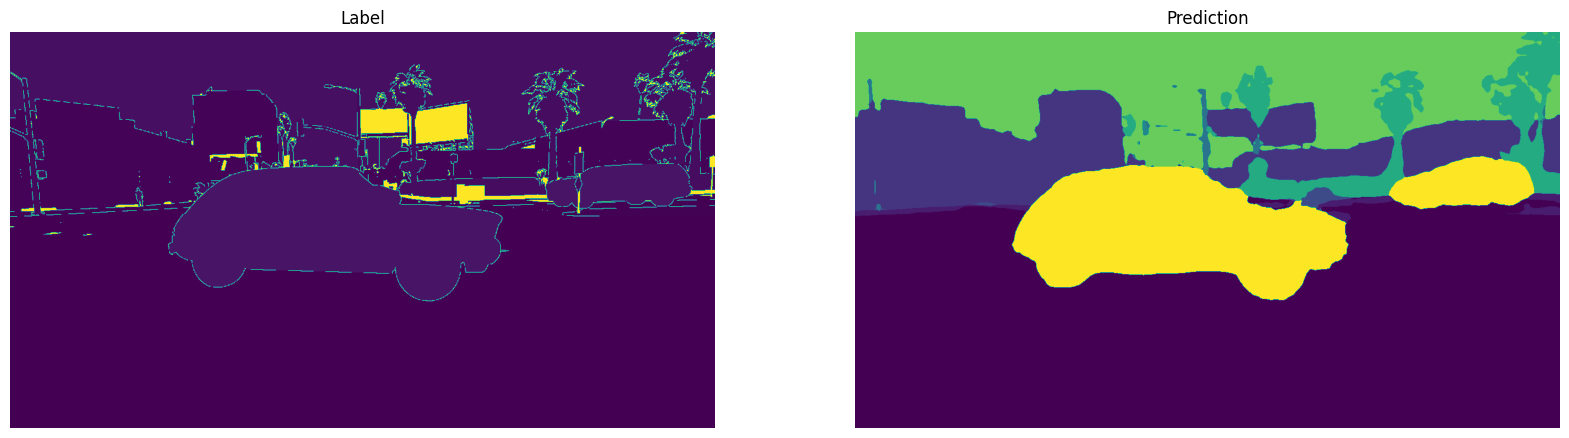

In [10]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_step3a/bisenet_shift.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()

### Evaluation - CityScapes

In [4]:
# These are the class labels for the Cityscapes dataset
class_labels = {
    0: 'road',
    1: 'sidewalk',
    2: 'building',
    3: 'wall',
    4: 'fence',
    5: 'pole',
    6: 'traffic light',
    7: 'traffic sign',
    8: 'vegetation',
    9: 'terrain',
    10: 'sky',
    11: 'person',
    12: 'rider',
    13: 'car',
    14: 'truck',
    15: 'bus',
    16: 'train',
    17: 'motorcycle',
    18: 'bicycle'
}

In [5]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_step3a/bisenet_shift.pth'))
# Set model to evaluation mode
model.eval()

## Get the miou for the Cityscapes dataset in the validation split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 500/500 [00:06<00:00, 74.69it/s]

Mean IoU: 0.2135 

road IoU: 0.6205
sidewalk IoU: 0.0919
building IoU: 0.6036
wall IoU: 0.0937
fence IoU: 0.0608
pole IoU: 0.1239
traffic light IoU: 0.0478
traffic sign IoU: 0.0509
vegetation IoU: 0.7301
terrain IoU: 0.2441
sky IoU: 0.5170
person IoU: 0.2846
rider IoU: 0.0222
car IoU: 0.4305
truck IoU: 0.0514
bus IoU: 0.0617
train IoU: 0.0002
motorcycle IoU: 0.0201
bicycle IoU: 0.0014


### Example

0it [00:00, ?it/s]


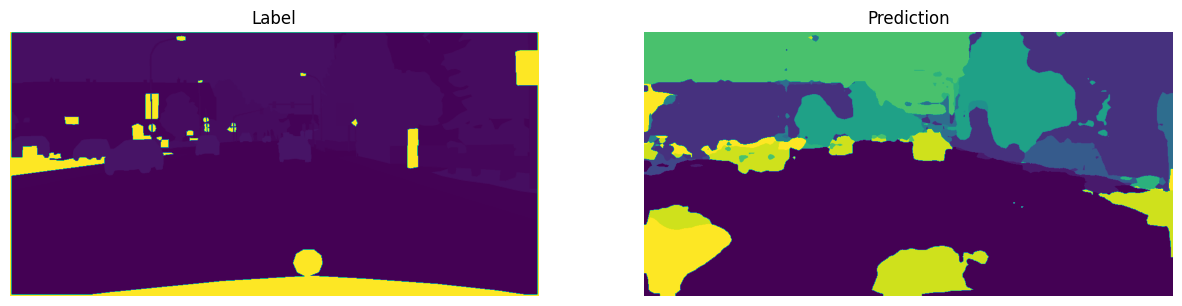

In [12]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_step3a/bisenet_shift.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()